**Importing Libraries**

In [ ]:
# Pandas for dataframe and data manipulation
import pandas as pd
import numpy as np

# Matplotlib for plotting/visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn import preprocessing
label = preprocessing.LabelEncoder()    # for encoding text data

# For statistical analysis
from scipy import stats
from scipy.stats import ttest_ind

# For data scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# For clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA    # dimensionality reduction

In [ ]:
# load the dataset
df_1 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/Fiverr/knn_5_imputed_dataset.xlsx")

In [ ]:
pathway_pro_82 = [
    "Samples","Gender", "Age_Group", "ABCC6", "ACBD5", "AFG3L2", "AIPL1", "ALMS1", "APOD", "APOE", "ARL2BP", "ARL6", "ARMS2",
    "ARSG", "BBS10", "BBS2", "BEST1", "C2", "C3", "C8orf37", "CABP4", "CACNA1F", "CAPN5",
    "CC2D2A", "CFB", "CFD", "CFHR1", "CHM", "CLCC1", "CLN3", "CLRN1", "CLUAP1", "CNGB3",
    "CNNM4", "COX2", "CYSLT1R", "ESPN", "GRK1", "GUCY2D", "HGSNAT", "HMCN1", "IFT27", "IMPG1",
    "ITM2B", "KLHL7", "LCA5", "LRAT", "LRP5", "LTB4R", "LTE4", "LZTFL1", "MYO7A", "NDP",
    "NEK2", "NPHP1", "NR2E3", "NRL", "PCARE", "PCDH15", "PDE6B", "PDE6C", "PDZD7", "PEX7",
    "POC1B", "PRDM13", "PROM1", "PRPF4", "RB1", "RDH5", "REEP6", "RGR", "RGS9BP", "RLBP1",
    "RP1L1", "RPGR", "SAG", "SDCCAG8", "TIMP3", "TSPAN12", "TTC8", "TUBGCP4", "TUBGCP6",
    "USH2A", "VEGFA", "WDPCP"]


In [ ]:
# Create a new dataset with pathway specific proteins

df_pathway = df_1[pathway_pro_82]

In [ ]:
df_pathway.head() # display dataset's 1st 5 rows

Samples  Gender Age_Group  ABCC6  ACBD5  AFG3L2  AIPL1  ALMS1   APOD  \
0  1_50:60_F  Female     50-60   64.6  253.0    92.0  151.0  114.0  104.2   
1  2_50:60_F  Female     50-60   76.0  239.0    76.8  150.0  120.0  104.2   
2  3_40:50_F  Female     40-50   55.0  257.0    79.8  144.0  131.0  117.0   
3  4_40:50_F  Female     40-50   70.0  228.0    72.0  145.0  140.0  104.0   
4  5_50:60_F  Female     50-60   74.2  250.8    67.0  161.6  113.0   92.0   

   APOE  ...    SAG  SDCCAG8  TIMP3  TSPAN12   TTC8  TUBGCP4  TUBGCP6  USH2A  \
0  95.6  ...   82.0    192.0  156.4    163.2  220.0    182.0    124.0  275.0   
1  86.0  ...   84.0    203.0  159.0    145.0  228.4    200.0    113.0  251.0   
2  97.8  ...   98.2    198.0  159.0    174.0  231.0    188.0    136.0  255.0   
3  96.0  ...   98.0    183.0  164.2    153.4  236.4    188.0    119.0  260.4   
4  95.2  ...  109.0    194.8  160.0    172.0  226.6    196.0    117.0  257.0   

   VEGFA  WDPCP  
0   73.0  165.0  
1   67.0  159.0  
2   72.0  162.0  
3   71.0  184.0  
4   68.0  170.0  

[5 rows x 85 columns]

In [ ]:
df_pathway.tail() # display dataset's last 5 rows

Samples Gender Age_Group  ABCC6  ACBD5  AFG3L2  AIPL1  ALMS1  APOD  \
495  235_50:60_M   Male     50-60   79.6  241.0    78.6  147.0  121.6  83.4   
496  236_40:50_M   Male     40-50   78.0  247.4    72.0  153.2  124.6  75.0   
497  237_50:60_M   Male     50-60   79.4  260.0    87.6  139.0  125.8  89.0   
498  238_40:50_M   Male     40-50   74.6  240.0    80.0  136.0  142.0  88.0   
499  239_50:60_M   Male     50-60   67.0  238.0    94.0  145.0  122.0  87.8   

     APOE  ...   SAG  SDCCAG8  TIMP3  TSPAN12   TTC8  TUBGCP4  TUBGCP6  USH2A  \
495  78.0  ...  81.0    191.0  180.2    165.0  243.0    201.6    118.0  258.2   
496  85.0  ...  74.0    175.8  186.0    171.4  241.0    201.0    112.0  256.0   
497  81.0  ...  85.8    170.0  174.0    190.0  229.4    197.8    131.0  256.0   
498  88.4  ...  72.0    189.0  182.0    172.0  238.0    198.4    104.0  259.0   
499  81.0  ...  87.2    181.0  185.0    170.0  251.0    199.6    108.0  250.8   

     VEGFA  WDPCP  
495   87.0  174.0  
496   88.4  166.0  
497   96.0  162.0  
498   78.0  181.0  
499   81.0  165.0  

[5 rows x 85 columns]

In [ ]:
print(df_pathway.shape)   # dataset rows & columns
df_pathway.columns        # columns of the dataset

(500, 85)


Index(['Samples', 'Gender', 'Age_Group', 'ABCC6', 'ACBD5', 'AFG3L2', 'AIPL1',
       'ALMS1', 'APOD', 'APOE', 'ARL2BP', 'ARL6', 'ARMS2', 'ARSG', 'BBS10',
       'BBS2', 'BEST1', 'C2', 'C3', 'C8orf37', 'CABP4', 'CACNA1F', 'CAPN5',
       'CC2D2A', 'CFB', 'CFD', 'CFHR1', 'CHM', 'CLCC1', 'CLN3', 'CLRN1',
       'CLUAP1', 'CNGB3', 'CNNM4', 'COX2', 'CYSLT1R', 'ESPN', 'GRK1', 'GUCY2D',
       'HGSNAT', 'HMCN1', 'IFT27', 'IMPG1', 'ITM2B', 'KLHL7', 'LCA5', 'LRAT',
       'LRP5', 'LTB4R', 'LTE4', 'LZTFL1', 'MYO7A', 'NDP', 'NEK2', 'NPHP1',
       'NR2E3', 'NRL', 'PCARE', 'PCDH15', 'PDE6B', 'PDE6C', 'PDZD7', 'PEX7',
       'POC1B', 'PRDM13', 'PROM1', 'PRPF4', 'RB1', 'RDH5', 'REEP6', 'RGR',
       'RGS9BP', 'RLBP1', 'RP1L1', 'RPGR', 'SAG', 'SDCCAG8', 'TIMP3',
       'TSPAN12', 'TTC8', 'TUBGCP4', 'TUBGCP6', 'USH2A', 'VEGFA', 'WDPCP'],
      dtype='object')

In [ ]:
print(list(df_pathway.columns))     # columns

['Samples', 'Gender', 'Age_Group', 'ABCC6', 'ACBD5', 'AFG3L2', 'AIPL1', 'ALMS1', 'APOD', 'APOE', 'ARL2BP', 'ARL6', 'ARMS2', 'ARSG', 'BBS10', 'BBS2', 'BEST1', 'C2', 'C3', 'C8orf37', 'CABP4', 'CACNA1F', 'CAPN5', 'CC2D2A', 'CFB', 'CFD', 'CFHR1', 'CHM', 'CLCC1', 'CLN3', 'CLRN1', 'CLUAP1', 'CNGB3', 'CNNM4', 'COX2', 'CYSLT1R', 'ESPN', 'GRK1', 'GUCY2D', 'HGSNAT', 'HMCN1', 'IFT27', 'IMPG1', 'ITM2B', 'KLHL7', 'LCA5', 'LRAT', 'LRP5', 'LTB4R', 'LTE4', 'LZTFL1', 'MYO7A', 'NDP', 'NEK2', 'NPHP1', 'NR2E3', 'NRL', 'PCARE', 'PCDH15', 'PDE6B', 'PDE6C', 'PDZD7', 'PEX7', 'POC1B', 'PRDM13', 'PROM1', 'PRPF4', 'RB1', 'RDH5', 'REEP6', 'RGR', 'RGS9BP', 'RLBP1', 'RP1L1', 'RPGR', 'SAG', 'SDCCAG8', 'TIMP3', 'TSPAN12', 'TTC8', 'TUBGCP4', 'TUBGCP6', 'USH2A', 'VEGFA', 'WDPCP']


In [ ]:
df_pathway.info()     # details of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 85 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Samples    500 non-null    object 
 1   Gender     500 non-null    object 
 2   Age_Group  500 non-null    object 
 3   ABCC6      500 non-null    float64
 4   ACBD5      500 non-null    float64
 5   AFG3L2     500 non-null    float64
 6   AIPL1      500 non-null    float64
 7   ALMS1      500 non-null    float64
 8   APOD       500 non-null    float64
 9   APOE       500 non-null    float64
 10  ARL2BP     500 non-null    float64
 11  ARL6       500 non-null    float64
 12  ARMS2      500 non-null    float64
 13  ARSG       500 non-null    float64
 14  BBS10      500 non-null    float64
 15  BBS2       500 non-null    float64
 16  BEST1      500 non-null    float64
 17  C2         500 non-null    float64
 18  C3         500 non-null    float64
 19  C8orf37    500 non-null    float64
 20  CABP4     

In [ ]:
# looking for missing values
df_pathway.isnull().sum()

Samples      0
Gender       0
Age_Group    0
ABCC6        0
ACBD5        0
            ..
TUBGCP4      0
TUBGCP6      0
USH2A        0
VEGFA        0
WDPCP        0
Length: 85, dtype: int64

In [ ]:
# looking for duplicate values
df_pathway.duplicated().sum()

0

In [ ]:
df_pathway.describe().T       # columns statistical analysis

count      mean        std    min     25%    50%    75%    max
ABCC6    500.0   73.0436   8.142948   53.0   67.00   72.8   78.4   93.0
ACBD5    500.0  244.5780   7.159824  228.0  240.55  244.8  249.0  261.0
AFG3L2   500.0   81.7380   7.714905   65.0   76.00   81.7   87.0   99.0
AIPL1    500.0  152.7404   9.305549  133.0  145.60  153.0  159.2  172.0
ALMS1    500.0  127.2232   7.399557  112.0  122.00  127.2  132.4  142.0
...        ...       ...        ...    ...     ...    ...    ...    ...
TUBGCP4  500.0  194.8428   8.834212  176.0  188.00  195.0  201.6  213.0
TUBGCP6  500.0  123.4980   8.535715  104.0  117.00  123.7  129.6  142.0
USH2A    500.0  259.8312   8.760486  242.0  253.00  259.2  267.0  279.0
VEGFA    500.0   81.0864  10.932237   58.0   73.90   81.0   88.0  106.0
WDPCP    500.0  172.2520   8.160554  155.0  166.00  173.0  178.0  188.0

[82 rows x 8 columns]

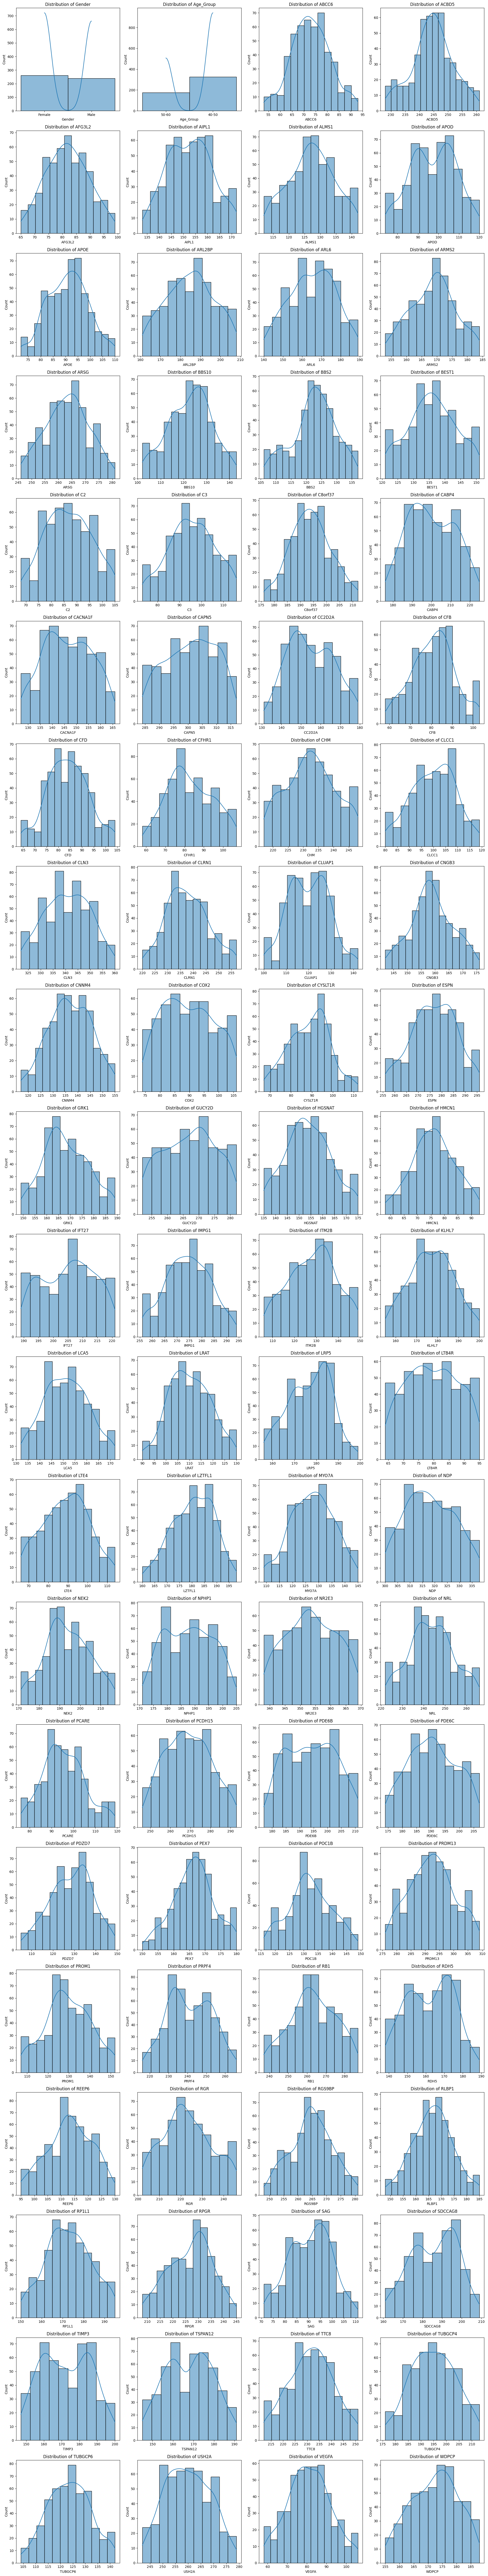

In [ ]:
# Data distribution of all columns
# Number of columns to be plotted
num_columns = len(df_pathway.columns) - 1  # Subtracting 1 to exclude the first column

# Calculate the number of rows and columns needed
num_cols = 4
num_rows = (num_columns // num_cols) + (num_columns % num_cols != 0)

# Visualize the distribution of each peptide
plt.figure(figsize=(20, num_rows * 5))  # Adjust height based on the number of rows
for i, column in enumerate(df_pathway.columns[1:], 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df_pathway[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [ ]:
df_corr = df_pathway.iloc[:, 3:]    # correlation among columns
df_corr.corr()

ABCC6     ACBD5    AFG3L2     AIPL1     ALMS1      APOD      APOE  \
ABCC6    1.000000 -0.006913  0.201009 -0.247179  0.009502 -0.399656 -0.203980   
ACBD5   -0.006913  1.000000  0.069659 -0.006328  0.043451 -0.056869 -0.087388   
AFG3L2   0.201009  0.069659  1.000000 -0.139195 -0.035086 -0.230001 -0.128262   
AIPL1   -0.247179 -0.006328 -0.139195  1.000000  0.089026  0.432330  0.213444   
ALMS1    0.009502  0.043451 -0.035086  0.089026  1.000000  0.058298 -0.015196   
...           ...       ...       ...       ...       ...       ...       ...   
TUBGCP4  0.184417 -0.029053  0.065289 -0.303022 -0.078597 -0.331808 -0.199273   
TUBGCP6 -0.275209 -0.035775 -0.083996  0.266525  0.035828  0.414145  0.241690   
USH2A   -0.240994 -0.011739 -0.017654  0.164313  0.006964  0.226301  0.128686   
VEGFA    0.387776  0.137327  0.216152 -0.386823 -0.029454 -0.552849 -0.277941   
WDPCP   -0.173950 -0.036109 -0.089541  0.201605  0.136201  0.231142  0.174856   

           ARL2BP      ARL6     ARMS2  ...       SAG   SDCCAG8     TIMP3  \
ABCC6   -0.317558 -0.410063 -0.076609  ... -0.243910 -0.401094  0.466175   
ACBD5   -0.135296 -0.102067  0.026924  ... -0.043959 -0.049694  0.104775   
AFG3L2  -0.230605 -0.201388 -0.056123  ... -0.194094 -0.252402  0.211168   
AIPL1    0.383537  0.405216 -0.062581  ...  0.332855  0.473759 -0.415811   
ALMS1   -0.006899  0.030789 -0.013515  ... -0.046938  0.081239 -0.049646   
...           ...       ...       ...  ...       ...       ...       ...   
TUBGCP4 -0.255556 -0.295487 -0.059906  ... -0.257583 -0.374608  0.327130   
TUBGCP6  0.307103  0.299328 -0.060749  ...  0.266935  0.378052 -0.405126   
USH2A    0.183344  0.330574  0.008769  ...  0.230225  0.234647 -0.267257   
VEGFA   -0.520422 -0.550211  0.073771  ... -0.437305 -0.581857  0.631375   
WDPCP    0.209889  0.243792 -0.023399  ...  0.155022  0.283529 -0.246622   

          TSPAN12      TTC8   TUBGCP4   TUBGCP6     USH2A     VEGFA     WDPCP  
ABCC6    0.401942  0.291225  0.184417 -0.275209 -0.240994  0.387776 -0.173950  
ACBD5    0.084618 -0.007655 -0.029053 -0.035775 -0.011739  0.137327 -0.036109  
AFG3L2   0.226153  0.180567  0.065289 -0.083996 -0.017654  0.216152 -0.089541  
AIPL1   -0.372613 -0.323793 -0.303022  0.266525  0.164313 -0.386823  0.201605  
ALMS1   -0.066829 -0.054514 -0.078597  0.035828  0.006964 -0.029454  0.136201  
...           ...       ...       ...       ...       ...       ...       ...  
TUBGCP4  0.265891  0.281642  1.000000 -0.211624 -0.149259  0.238338 -0.229400  
TUBGCP6 -0.311856 -0.215724 -0.211624  1.000000  0.118999 -0.306386  0.077858  
USH2A   -0.243467 -0.213216 -0.149259  0.118999  1.000000 -0.226347  0.098308  
VEGFA    0.546892  0.373535  0.238338 -0.306386 -0.226347  1.000000 -0.216504  
WDPCP   -0.246372 -0.202734 -0.229400  0.077858  0.098308 -0.216504  1.000000  

[82 rows x 82 columns]

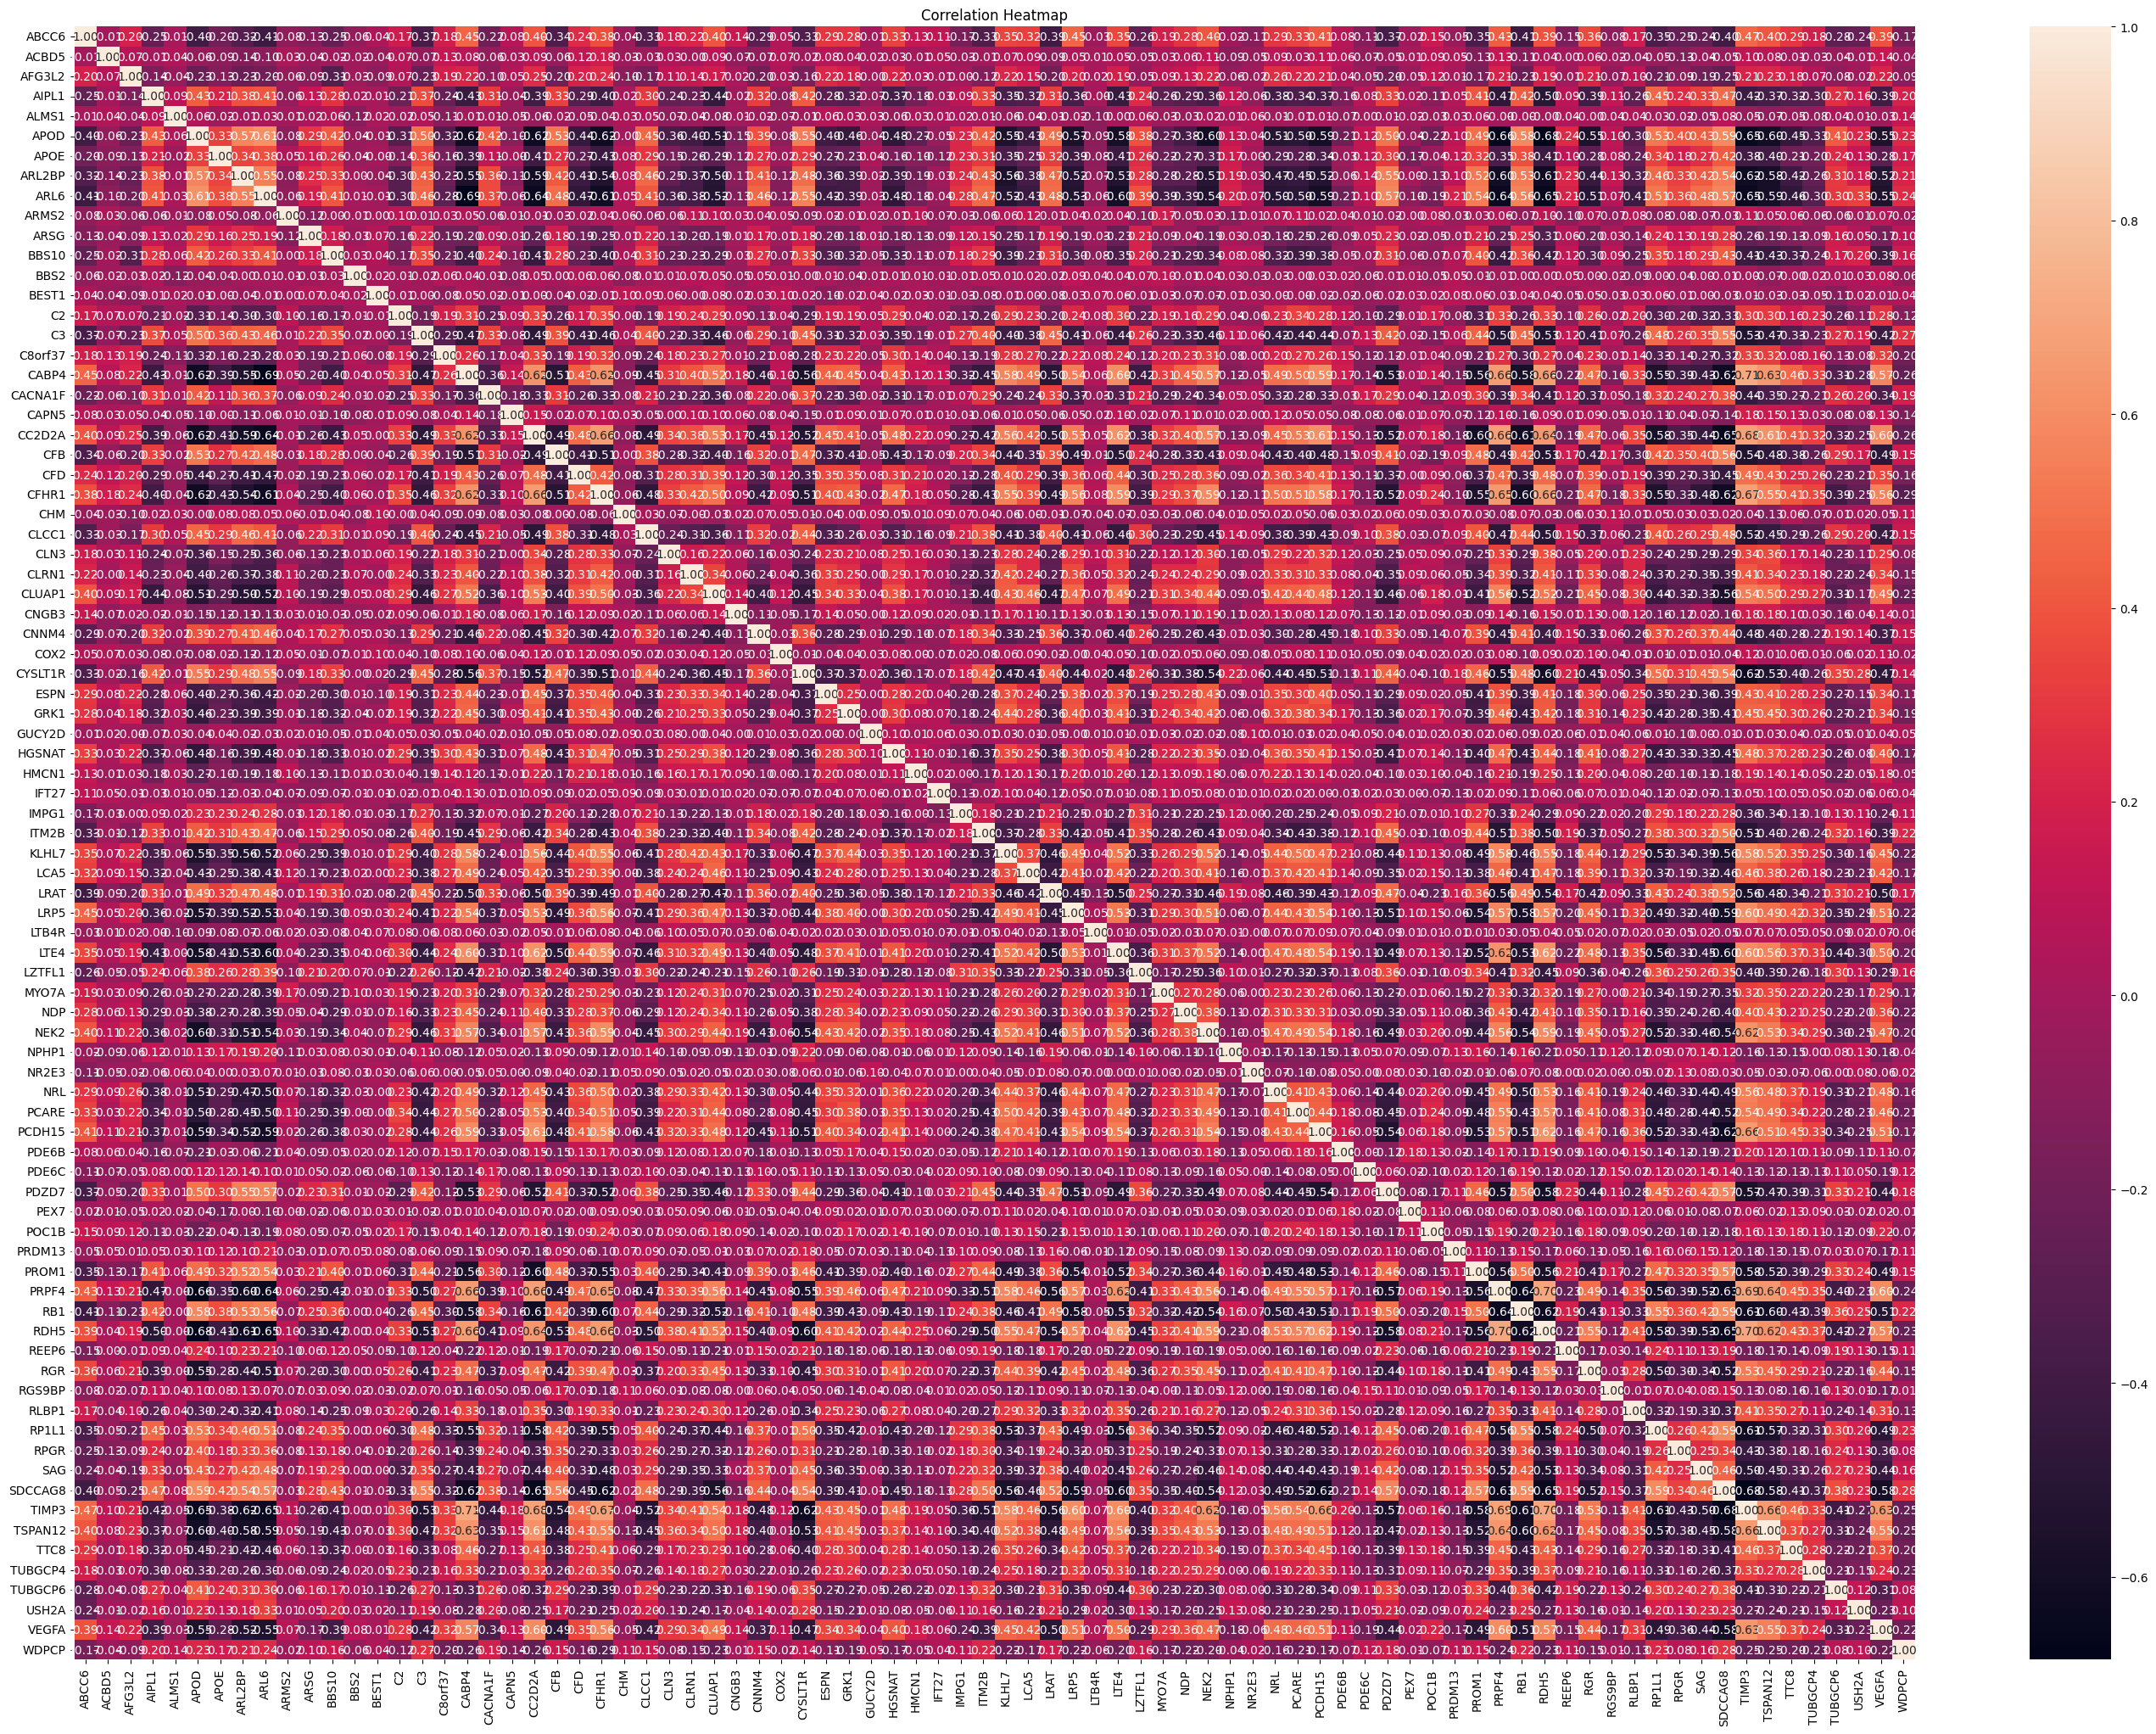

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(35, 25))
correlation_matrix = df_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Here, we calculated the frequency of each protein across samples, along with their average concentration (mean) and standard deviation. Additionally, we determined the standard deviation as a percentage of the mean expression, known as the coefficient of variation (CV). This provides a relative measure of the variability in expression levels.

In [ ]:
# dictionary to store results for each protein
protein_stats = {}

for protein in df_pathway.columns[3:]:
    expression_data = df_pathway[protein]

    # Frequency (percentage of patients expressing the protein)
    frequency = round((expression_data > 0).sum() / len(expression_data) * 100, 3)

    # Spectral Counting Mean (average concentration)
    mean_expression = round(expression_data.mean(), 3)

    # Standard Deviation and Percentage (mean expression)
    std_dev = round(expression_data.std(), 3)
    std_dev_percentage = round((std_dev / mean_expression) * 100, 3) if mean_expression != 0 else np.nan

    # store the results
    protein_stats[protein] = {
        'Frequency (%)': frequency,
        'Mean Expression': mean_expression,
        'Standard Deviation': std_dev,
        'Std Dev (%)': std_dev_percentage
    }

# convert to DataFrame
protein_stats_df = pd.DataFrame(protein_stats).T

In [ ]:
protein_stats_df

Frequency (%)  Mean Expression  Standard Deviation  Std Dev (%)
ABCC6            100.0           73.044               8.143       11.148
ACBD5            100.0          244.578               7.160        2.927
AFG3L2           100.0           81.738               7.715        9.439
AIPL1            100.0          152.740               9.306        6.093
ALMS1            100.0          127.223               7.400        5.817
...                ...              ...                 ...          ...
TUBGCP4          100.0          194.843               8.834        4.534
TUBGCP6          100.0          123.498               8.536        6.912
USH2A            100.0          259.831               8.760        3.371
VEGFA            100.0           81.086              10.932       13.482
WDPCP            100.0          172.252               8.161        4.738

[82 rows x 4 columns]

Performed statistical tests to identify proteins that show significant differences in expression levels between different genders (male and female) and between different age groups (40-50 and 50-60).

In [ ]:
# Segregate data by gender and age group
males = df_pathway[df_pathway['Gender'] == 'Male']
females = df_pathway[df_pathway['Gender'] == 'Female']

age_40_50 = df_pathway[df_pathway['Age_Group'] == '40-50']
age_50_60 = df_pathway[df_pathway['Age_Group'] == '50-60']

# List to store significant proteins
significant_proteins_gender = []
significant_proteins_age = []

for protein in df_pathway.columns[3:]:
    # Gender differences (t-test)
    t_stat, p_val_gender = ttest_ind(males[protein], females[protein], nan_policy='omit')
    if p_val_gender < 0.05:
        significant_proteins_gender.append(protein)

    # Age group differences (t-test)
    t_stat, p_val_age = ttest_ind(age_40_50[protein], age_50_60[protein], nan_policy='omit')
    if p_val_age < 0.05:
        significant_proteins_age.append(protein)

print("Proteins with significant differences between genders:", significant_proteins_gender)
print("Proteins with significant differences between age groups:", significant_proteins_age)


Proteins with significant differences between genders: ['ABCC6', 'ACBD5', 'AFG3L2', 'AIPL1', 'APOD', 'APOE', 'ARL2BP', 'ARL6', 'ARMS2', 'ARSG', 'BBS10', 'C2', 'C3', 'C8orf37', 'CABP4', 'CACNA1F', 'CAPN5', 'CC2D2A', 'CFB', 'CFD', 'CFHR1', 'CLCC1', 'CLN3', 'CLRN1', 'CLUAP1', 'CNGB3', 'CNNM4', 'COX2', 'CYSLT1R', 'ESPN', 'GRK1', 'HGSNAT', 'HMCN1', 'IFT27', 'IMPG1', 'ITM2B', 'KLHL7', 'LCA5', 'LRAT', 'LRP5', 'LTE4', 'LZTFL1', 'MYO7A', 'NDP', 'NEK2', 'NPHP1', 'NRL', 'PCARE', 'PCDH15', 'PDE6B', 'PDE6C', 'PDZD7', 'POC1B', 'PRDM13', 'PROM1', 'PRPF4', 'RB1', 'RDH5', 'REEP6', 'RGR', 'RGS9BP', 'RLBP1', 'RP1L1', 'RPGR', 'SAG', 'SDCCAG8', 'TIMP3', 'TSPAN12', 'TTC8', 'TUBGCP4', 'TUBGCP6', 'USH2A', 'VEGFA', 'WDPCP']
Proteins with significant differences between age groups: ['ARMS2', 'CLCC1', 'ESPN', 'HGSNAT', 'KLHL7']


In [ ]:
print('Number of significant proteins:', len(significant_proteins_gender))
print('Number of significant proteins:', len(significant_proteins_age))

Number of significant proteins: 74
Number of significant proteins: 5


Here, we normalized the spectral counting data and categorized the proteins based on their expression levels.

In [ ]:
p_columns = df_pathway.columns[3:]  # protein columns

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df_normalized = df_pathway.copy()
df_normalized[p_columns] = scaler.fit_transform(df_pathway[p_columns])

# Categorize proteins
def categorize_expression_level(value):
    if value >= 0.7:
        return 'Highly Expressed'
    elif value <= 0.3:
        return 'Lowly Expressed'
    else:
        return 'Moderately Expressed'

# Apply categorization to each protein column
df_categorized = df_normalized.copy()
for col in p_columns:
    df_categorized[col] = df_normalized[col].apply(categorize_expression_level)

# categorization results
summary = df_categorized[p_columns].apply(pd.Series.value_counts).fillna(0)
summary = summary.transpose()

# Display the summary
print(summary)

         Highly Expressed  Lowly Expressed  Moderately Expressed
ABCC6                  78               80                   342
ACBD5                  85               79                   336
AFG3L2                102              111                   287
AIPL1                 103              104                   293
ALMS1                 120              116                   264
...                   ...              ...                   ...
TUBGCP4               122              109                   269
TUBGCP6               108               90                   302
USH2A                 112              139                   249
VEGFA                  83              111                   306
WDPCP                 124              105                   271

[82 rows x 3 columns]


In [ ]:
# convert the result summary in a DataFrame
summary_df = summary.reset_index()
summary_df.columns = ['Protein', 'Highly Expressed', 'Lowly Expressed', 'Moderately Expressed']

In [ ]:
summary_df

Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0     ABCC6                78               80                   342
1     ACBD5                85               79                   336
2    AFG3L2               102              111                   287
3     AIPL1               103              104                   293
4     ALMS1               120              116                   264
..      ...               ...              ...                   ...
77  TUBGCP4               122              109                   269
78  TUBGCP6               108               90                   302
79    USH2A               112              139                   249
80    VEGFA                83              111                   306
81    WDPCP               124              105                   271

[82 rows x 4 columns]

In [ ]:
# Function to normalize and categorize proteins
def normalize_and_categorize(df, p_columns):
    # Normalize the data using MinMaxScaler
    scaler = MinMaxScaler()
    df_normalized = df.copy()
    df_normalized[p_columns] = scaler.fit_transform(df[p_columns])

    # Apply categorization to each protein column
    df_categorized = df_normalized.copy()
    for col in p_columns:
        df_categorized[col] = df_normalized[col].apply(categorize_expression_level)

    # Summarize the categorization results
    summary = df_categorized[p_columns].apply(pd.Series.value_counts).fillna(0)
    summary = summary.transpose()

    # Convert the result summary into a DataFrame
    summary_df = summary.reset_index()
    summary_df.columns = ['Protein', 'Highly Expressed', 'Lowly Expressed', 'Moderately Expressed']
    return summary_df

# Normalize and categorize for Male
summary_male_df = normalize_and_categorize(males, p_columns)

# Normalize and categorize for Female
summary_female_df = normalize_and_categorize(females, p_columns)

# Display the results
print("Summary for Males:")
print(summary_male_df)

print("\nSummary for Females:")
print(summary_female_df)

Summary for Males:
    Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0     ABCC6                42               55                   142
1     ACBD5                39               52                   148
2    AFG3L2                54               48                   137
3     AIPL1                45               62                   132
4     ALMS1                58               61                   120
..      ...               ...              ...                   ...
77  TUBGCP4                69               59                   111
78  TUBGCP6                60               51                   128
79    USH2A                60               65                   114
80    VEGFA                41               72                   126
81    WDPCP                52               63                   124

[82 rows x 4 columns]

Summary for Females:
    Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0     ABCC6                60          

In [ ]:
# Normalize and categorize for Age 40-50
summary_age_40_50_df = normalize_and_categorize(age_40_50, p_columns)

# Normalize and categorize for Age 50-60
summary_age_50_60_df = normalize_and_categorize(age_50_60, p_columns)

# Display the results
print("Summary for Age 40-50:")
print(summary_age_40_50_df)

print("\nSummary for Age 50-60:")
print(summary_age_50_60_df)

Summary for Age 40-50:
    Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0     ABCC6                48               50                   227
1     ACBD5                53               58                   214
2    AFG3L2                59               77                   189
3     AIPL1                69               61                   195
4     ALMS1                81               77                   167
..      ...               ...              ...                   ...
77  TUBGCP4                79               70                   176
78  TUBGCP6                73               47                   205
79    USH2A                70               90                   165
80    VEGFA                52               75                   198
81    WDPCP                82               67                   176

[82 rows x 4 columns]

Summary for Age 50-60:
    Protein  Highly Expressed  Lowly Expressed  Moderately Expressed
0     ABCC6                30    

Performed clustering to identify natural groupings or patterns in our data. We used K-means algorithm and Elbow method to determine the optimal number of clusters by plotting the Within-Cluster Sum of Square (WCSS) against different numbers of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

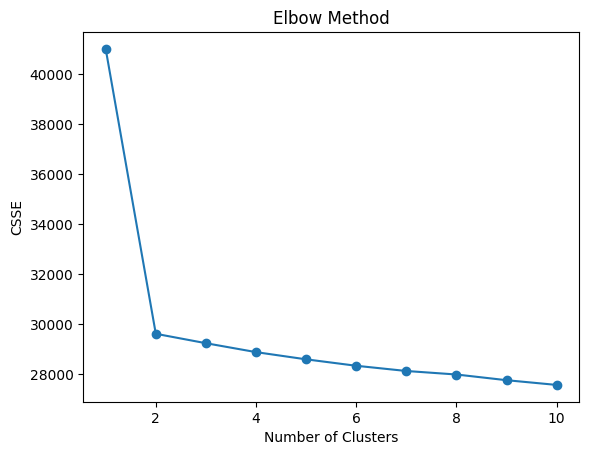

In [ ]:
pro_columns = df_pathway.columns[3:]

# Data Standardization/Normalization
s_scaler = StandardScaler()
# m_scaler = MinMaxScaler()
X = s_scaler.fit_transform(df_pathway[pro_columns])

k_rang = range(1, 11)
csse = []

for k in k_rang:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    csse.append(kmeans.inertia_)    # sum of square error

# Plotting the Elbow Curve
plt.plot(k_rang, csse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('CSSE')
plt.show()

In [ ]:
csse

[41000.00000000002,
 29610.54304361741,
 29234.42749826244,
 28877.635654948328,
 28589.519425839528,
 28332.32328737148,
 28123.506744495393,
 27982.803578629922,
 27755.608604050532,
 27566.384386541988]

In [ ]:
# K-means Clustering (optimal k based on the Elbow plot)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(X)
print(clusters)

# Add cluster labels to the DataFrame
df_cluster = df_pathway.copy()
df_cluster['Cluster'] = clusters

# print the DataFrame
df_cluster

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Samples  Gender Age_Group  ABCC6  ACBD5  AFG3L2  AIPL1  ALMS1   APOD  \
0      1_50:60_F  Female     50-60   64.6  253.0    92.0  151.0  114.0  104.2   
1      2_50:60_F  Female     50-60   76.0  239.0    76.8  150.0  120.0  104.2   
2      3_40:50_F  Female     40-50   55.0  257.0    79.8  144.0  131.0  117.0   
3      4_40:50_F  Female     40-50   70.0  228.0    72.0  145.0  140.0  104.0   
4      5_50:60_F  Female     50-60   74.2  250.8    67.0  161.6  113.0   92.0   
..           ...     ...       ...    ...    ...     ...    ...    ...    ...   
495  235_50:60_M    Male     50-60   79.6  241.0    78.6  147.0  121.6   83.4   
496  236_40:50_M    Male     40-50   78.0  247.4    72.0  153.2  124.6   75.0   
497  237_50:60_M    Male     50-60   79.4  260.0    87.6  139.0  125.8   89.0   
498  238_40:50_M    Male     40-50   74.6  240.0    80.0  136.0  142.0   88.0   
499  239_50:60_M    Male     50-60   67.0  238.0    94.0  145.0  122.0   87.8   

     APOE  ...  SDCCAG8  TIMP3  TSPAN12   TTC8  TUBGCP4  TUBGCP6  USH2A  \
0    95.6  ...    192.0  156.4    163.2  220.0    182.0    124.0  275.0   
1    86.0  ...    203.0  159.0    145.0  228.4    200.0    113.0  251.0   
2    97.8  ...    198.0  159.0    174.0  231.0    188.0    136.0  255.0   
3    96.0  ...    183.0  164.2    153.4  236.4    188.0    119.0  260.4   
4    95.2  ...    194.8  160.0    172.0  226.6    196.0    117.0  257.0   
..    ...  ...      ...    ...      ...    ...      ...      ...    ...   
495  78.0  ...    191.0  180.2    165.0  243.0    201.6    118.0  258.2   
496  85.0  ...    175.8  186.0    171.4  241.0    201.0    112.0  256.0   
497  81.0  ...    170.0  174.0    190.0  229.4    197.8    131.0  256.0   
498  88.4  ...    189.0  182.0    172.0  238.0    198.4    104.0  259.0   
499  81.0  ...    181.0  185.0    170.0  251.0    199.6    108.0  250.8   

     VEGFA  WDPCP  Cluster  
0     73.0  165.0        1  
1     67.0  159.0        1  
2     72.0  162.0        1  
3     71.0  184.0        1  
4     68.0  170.0        1  
..     ...    ...      ...  
495   87.0  174.0        0  
496   88.4  166.0        0  
497   96.0  162.0        0  
498   78.0  181.0        0  
499   81.0  165.0        0  

[500 rows x 86 columns]

In [ ]:
# kmeans.cluster_centers_

df_cluster.value_counts('Cluster')

Cluster
1    261
0    239
Name: count, dtype: int64

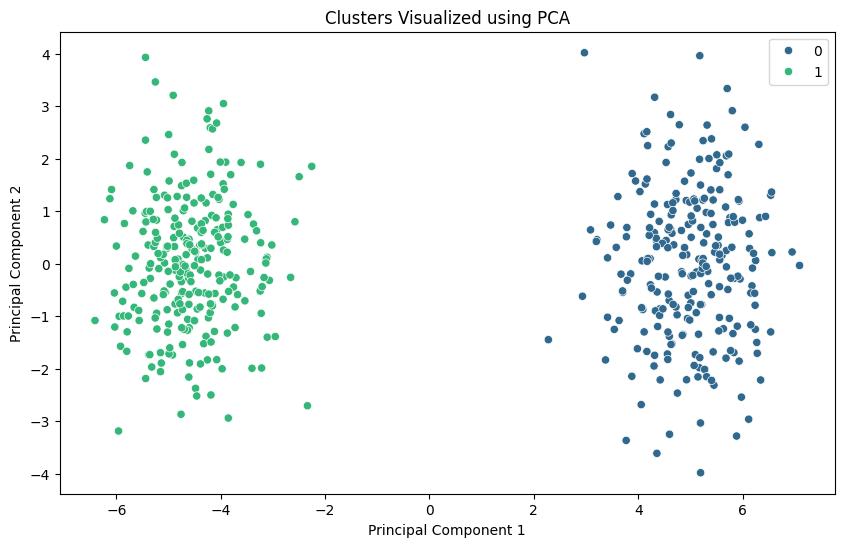

In [ ]:
# Visualize the Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

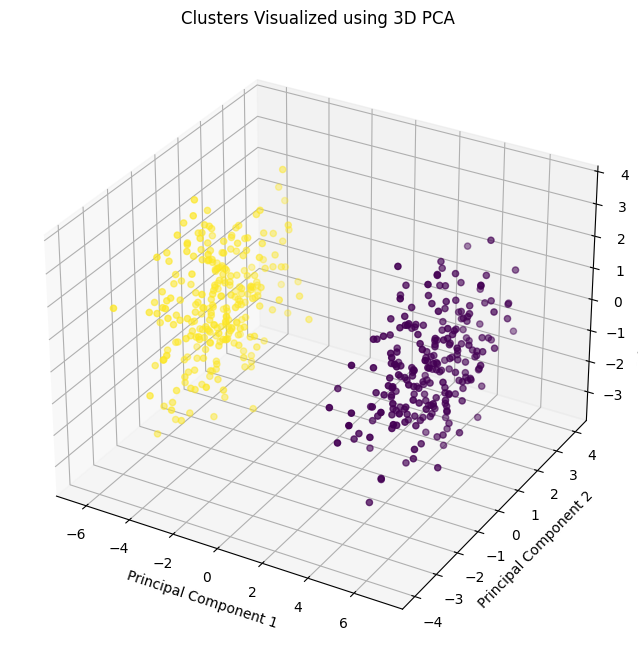

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Perform PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis')
ax.set_title('Clusters Visualized using 3D PCA')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()
